Resultados de las puntuaciones: 
La puntuacion usando la métrica F1-Score para una regresión logística es:  1.0
La puntuacion usando la métrica F1-Score para KNN es:  0.9333333333333333


Resultados de la prueba de McNemar: 
   - Chi-cuadrado: 0
   - Valor de p: 0.25
Resultados de la prueba de T pareada con VC 5x2: 
   - Estadístico t: 2.535462764185552
   - Valor de p: 0.05218140045705771




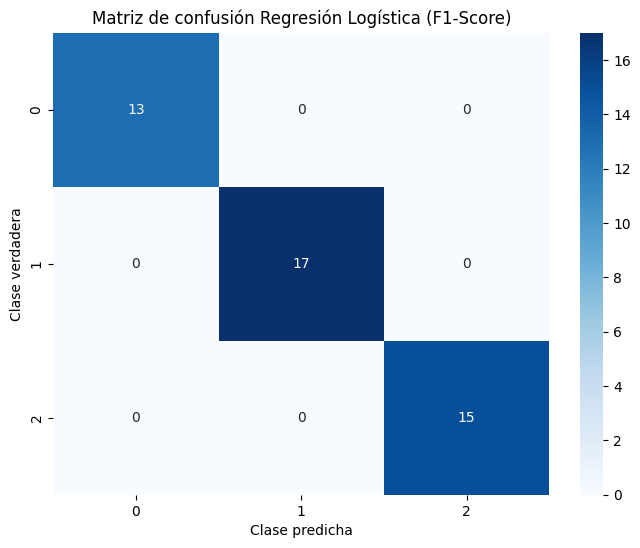

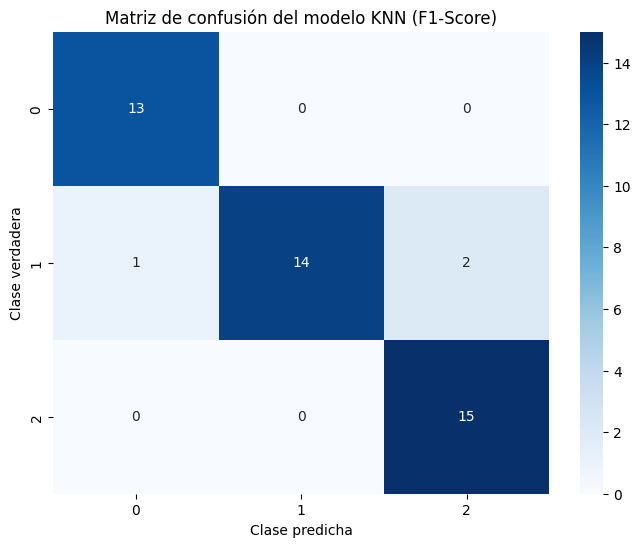

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix
from mlxtend.evaluate import mcnemar_table, mcnemar
from mlxtend.evaluate import paired_ttest_5x2cv
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")




vino=pd.read_csv('wine.csv')
Y=vino.iloc[:, 0]  #Variable categórica (objetivo)

#Vamos a escalar el resto de variables
est=StandardScaler()
vino_esc=est.fit_transform(vino.iloc[:, 1:])
X=pd.DataFrame(vino_esc, columns = vino.iloc[:, 1:].columns)


#Divido el dataset en dos prueba y entreneamiento, uso 25-75, para esta división.
entr_x,prueba_x,entr_y,prueba_y=train_test_split(X,Y,test_size=0.25,random_state=22)

#Tipo de métrica para calcular el rendimiento

tipo_metrica=3 #4 basado enprecisión 1 basado en f1_score
metrica=[accuracy_score,precision_score,recall_score,f1_score]
nomMetrica={0:"Exactitud", 1:"Precisión", 2:"Recall", 3:"F1-Score"}  

#Debido a que f1_score en este caso no es binario, ya que se clasificarán los datos en más
#de una clase, hay que elegir como se realiza el puntaje en f1_score, en este caso
#se ha elegido 'micro', es decir, que se calcula sumando los verdaderos positivos, falsos positivos 
#y falsos negativos de todas las clases, y luego se calcula el puntaje F1.

puntaje='micro'

print("Resultados de las puntuaciones: ")

# Clasificación mediante regresión logística (Clasificador lineal)
modRegLog=LogisticRegression(max_iter=1000)
modRegLog.fit(entr_x, entr_y)
predRegLog=modRegLog.predict(prueba_x)

if tipo_metrica<1:
  puntRegLog=metrica[tipo_metrica](prueba_y, predRegLog)
else:
  puntRegLog=metrica[tipo_metrica](prueba_y, predRegLog, average=puntaje)

logistic_confusion_matrix = confusion_matrix(prueba_y, predRegLog)
print("La puntuacion usando la métrica "+ nomMetrica[tipo_metrica] +" para una regresión logística es: ", puntRegLog)

# Clasificación mediante KNN (vecinos cercanos)
modKNN=KNeighborsClassifier()
modKNN.fit(entr_x, entr_y)
predKNN = modKNN.predict(prueba_x)
if tipo_metrica<1:
  puntKNN=metrica[tipo_metrica](prueba_y, predKNN)
else:
  puntKNN=metrica[tipo_metrica](prueba_y, predKNN, average=puntaje)
knn_confusion_matrix=confusion_matrix(prueba_y, predKNN)
print("La puntuacion usando la métrica "+ nomMetrica[tipo_metrica] +" para KNN es: ", puntKNN)

# Comparación de modelos
# Comparación usando la prueba de McNemar
tabla=mcnemar_table(y_target=prueba_y,y_model1=predRegLog,y_model2=predKNN)
resMcNemar=mcnemar(tabla, exact=True)


# Comparación usando la prueba T con validación cruzada pareada 5x2
resTTP5x2 = paired_ttest_5x2cv(estimator1=modRegLog,estimator2=modKNN,X=X,y=Y)

print("")
print("")
print("Resultados de la prueba de McNemar: ")
print("   - Chi-cuadrado: "+ str(resMcNemar[0]))
print("   - Valor de p: "+ str(resMcNemar[1]))

print("Resultados de la prueba de T pareada con VC 5x2: ")
print("   - Estadístico t: "+ str(resTTP5x2[0]))
print("   - Valor de p: "+ str(resTTP5x2[1]))
print("")
print("")

#El primer valor dado que proporciona paired_ttest_5x2cv corresponde al valor del estadístico 
#"t" se utiliza para calcular el p-valor asociado al test de McNemar. 


# Vamos a representar las matrices de confusión obtenidas para cada clasificación:

plt.figure(figsize=(8, 6))
sns.heatmap(logistic_confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de confusión Regresión Logística ("+nomMetrica[tipo_metrica]+")")
plt.xlabel("Clase predicha")
plt.ylabel("Clase verdadera")
plt.show()


plt.figure(figsize=(8, 6))
sns.heatmap(knn_confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de confusión del modelo KNN ("+nomMetrica[tipo_metrica]+")")
plt.xlabel("Clase predicha")
plt.ylabel("Clase verdadera")
plt.show()